In [1]:
import os.path
import pandas as pd

In [2]:
cwd = os.getcwd()
data_path = os.path.join(cwd, "data-temp", "API_SH.STA.AIRP.P5_DS2_en_csv_v2_285420.csv")
meta_path = os.path.join(cwd, "data-temp", "Metadata_Country_API_SH.STA.AIRP.P5_DS2_en_csv_v2_285420.csv")

data_path, meta_path
# !ls data-temp/

('/home/sorin/myData/PROJ-flatiron/project-mod3/data-temp/API_SH.STA.AIRP.P5_DS2_en_csv_v2_285420.csv',
 '/home/sorin/myData/PROJ-flatiron/project-mod3/data-temp/Metadata_Country_API_SH.STA.AIRP.P5_DS2_en_csv_v2_285420.csv')

In [3]:
data_df = pd.read_csv(data_path, skiprows=4)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 64 columns):
Country Name      264 non-null object
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              0 non-null float64
1961              0 non-null float64
1962              0 non-null float64
1963              0 non-null float64
1964              0 non-null float64
1965              0 non-null float64
1966              0 non-null float64
1967              0 non-null float64
1968              0 non-null float64
1969              0 non-null float64
1970              0 non-null float64
1971              0 non-null float64
1972              0 non-null float64
1973              0 non-null float64
1974              0 non-null float64
1975              0 non-null float64
1976              0 non-null float64
1977              0 non-null float64
1978              0 non-null float64
1979              0 non-null float64
198

In [4]:
columns_to_drop = set(data_df.columns).difference({"Country Code", "Country Name", "2016"})
data_df.drop(columns=list(columns_to_drop), inplace=True)
data_df.dropna(inplace=True)
data_df

,Country Name,Country Code,2016
1,Afghanistan,AFG,211.100000
2,Angola,AGO,118.500000
3,Albania,ALB,68.000000
5,Arab World,ARB,101.932592
6,United Arab Emirates,ARE,54.700000
...,...,...,...
258,Samoa,WSM,85.000000
260,"Yemen, Rep.",YEM,194.200000
261,South Africa,ZAF,86.700000
262,Zambia,ZMB,127.200000


In [5]:
meta_df = pd.read_csv(meta_path)
meta_df

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN
...,...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo,NaN
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep.",NaN
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa,NaN
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia,NaN


In [6]:
df = pd.merge(data_df, meta_df[["Country Code", "Region", "IncomeGroup"]], how="left")
df

,Country Name,Country Code,2016,Region,IncomeGroup
0,Afghanistan,AFG,211.100000,South Asia,Low income
1,Angola,AGO,118.500000,Sub-Saharan Africa,Lower middle income
2,Albania,ALB,68.000000,Europe & Central Asia,Upper middle income
3,Arab World,ARB,101.932592,NaN,NaN
4,United Arab Emirates,ARE,54.700000,Middle East & North Africa,High income
...,...,...,...,...,...
224,Samoa,WSM,85.000000,East Asia & Pacific,Upper middle income
225,"Yemen, Rep.",YEM,194.200000,Middle East & North Africa,Low income
226,South Africa,ZAF,86.700000,Sub-Saharan Africa,Upper middle income
227,Zambia,ZMB,127.200000,Sub-Saharan Africa,Lower middle income


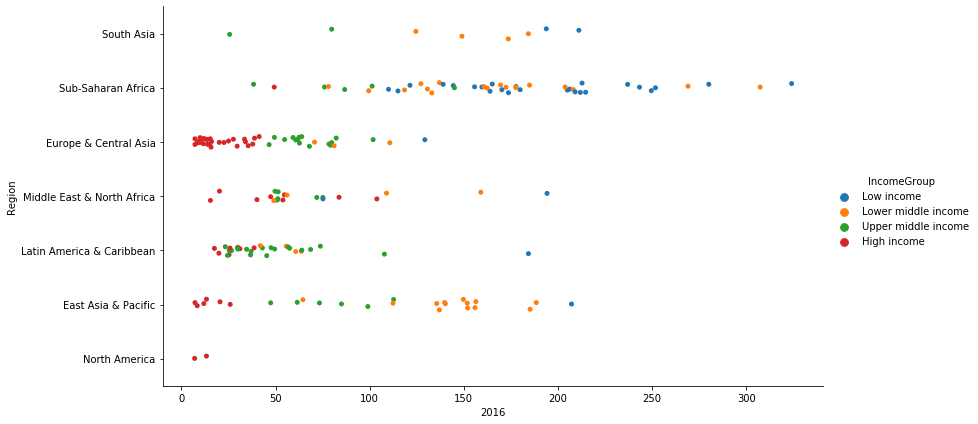

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.catplot(data=df, y="Region", x="2016", hue="IncomeGroup", height=6, aspect=2)